RMSE (1000 points): 130.34


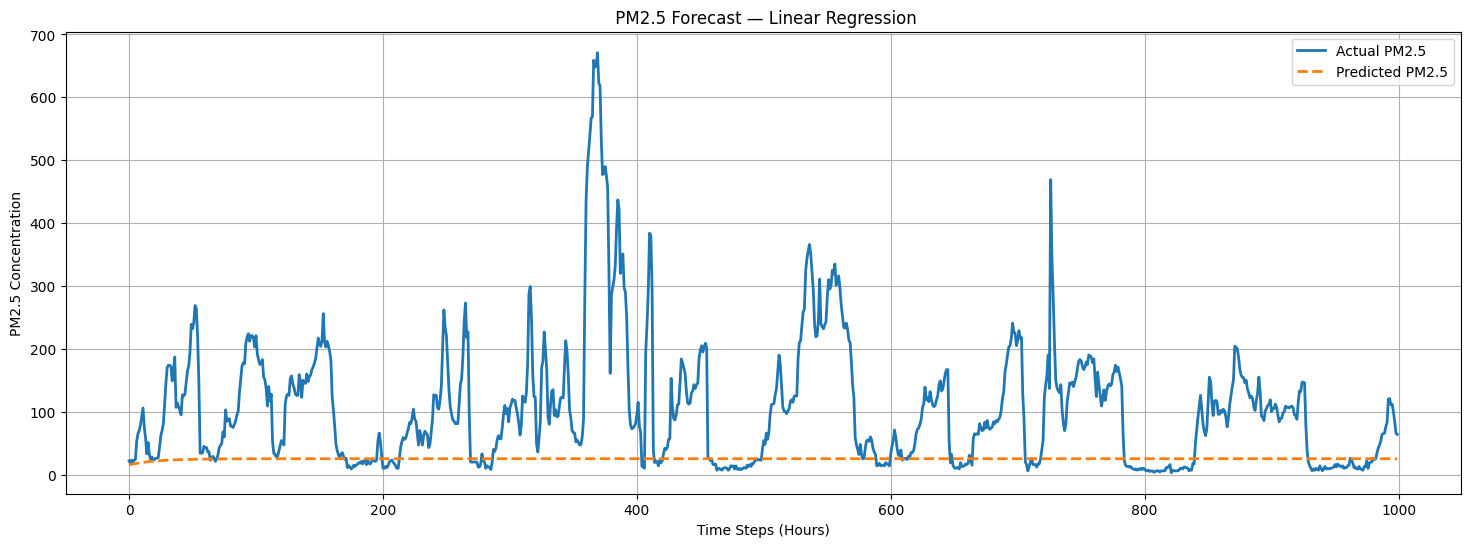

prediction graph saved successfully.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os

df = pd.read_csv(r"C:\Users\srust\Downloads\data.csv")
df = df.rename(columns={"pm2.5": "pm25"})
df = df.ffill().bfill()

features = ["pm25", "DEWP", "TEMP", "PRES", "Iws", "Is", "Ir"]
data = df[features]

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

X = scaled[:-1]
y = scaled[1:, 0]

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = LinearRegression()
model.fit(X_train, y_train)

POINTS = 1000

last_input = X_test[0].copy()
predictions_scaled = []

for _ in range(POINTS):
    pred = model.predict(last_input.reshape(1, -1))[0]
    predictions_scaled.append(pred)
    last_input[0] = pred

def inverse_pm25(vals):
    dummy = np.zeros((len(vals), scaled.shape[1]))
    dummy[:, 0] = vals
    return scaler.inverse_transform(dummy)[:, 0]

pred_1000 = inverse_pm25(np.array(predictions_scaled))
actual_1000 = inverse_pm25(y_test[:POINTS])

rmse = np.sqrt(mean_squared_error(actual_1000, pred_1000))
print(f"RMSE (1000 points): {rmse:.2f}")

output_dir = r"C:\Users\srust\OneDrive\Desktop\LINEAR_REGRESSION_OUTPUT"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(18,6))
plt.plot(actual_1000, label="Actual PM2.5", linewidth=2)
plt.plot(pred_1000, label="Predicted PM2.5", linestyle="--", linewidth=2)
plt.title(" PM2.5 Forecast — Linear Regression")
plt.xlabel("Time Steps (Hours)")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.grid(True)

plt.savefig(rf"{output_dir}\pm25_1000points_lr.png", dpi=300, bbox_inches="tight")
plt.show()

print("prediction graph saved successfully.")
